# Introduction to Pandas 3  

Congratulations! You've made it to the last week with coding! Last week, we spent more time reinforcing core pandas skills and explained that within the context of the data analysis workflow and our base camp core dataset (510K). This week, we will continue to use the pandas library to work with tabular data but on top on that, we will introduce the concept of [data visualization](https://hdsr.mitpress.mit.edu/pub/zok97i7p/release/4), which is a powerful way to visualize data. In particular, we will focus on:
- Common Data Visualization Charts
- Data visualization libraries for Python
  - [matplotlilb](https://matplotlib.org/): The goto library for data visualization in Python
  - [vega-altair](https://altair-viz.github.io/): A more modern library to visualize data with Python

Before we begin, we will import our 510K dataset yet again so we can use work with it. At the visualization phase, it is imperative that the datasets are cleansed prior. We already have a cleansed version of the dataset, including the dates so we will just import that. Make sure you have the `Basecamp_combined_cleansed.csv` downloaded and saved in the current directory. A slight tweak we added to the call is the `parse_dates` argument which tells pandas to auto convert the date columns specified into the datetime type. This assumes that they are in the format `yyyy-mm-dd`. We are also specifying the `KNUMBER` column up front.

In [14]:
import pandas as pd
dataset_510k = pd.read_csv(
    "Basecamp_combined_cleansed.csv"
    ,parse_dates=["DATERECEIVED", "DECISIONDATE"]
    ,index_col="KNUMBER"
    ,low_memory=False)

dataset_510k.head(1)

APPLICANT           CONTACT        STREET1 STREET2     CITY  \
KNUMBER                                                                       
DEN000001  OHMEDA MEDICAL  DANIEL  KOSEDNAR  P.O. BOX 7550     NaN  MADISON   

          STATE COUNTRY_CODE         ZIP POSTAL_CODE DECISION  ...  \
KNUMBER                                                        ...   
DEN000001    WI           US  53707-7550  53707-7550     DENG  ...   

          STATEORSUMM CLASSADVISECOMM SSPINDICATOR      TYPE  THIRDPARTY  \
KNUMBER                                                                    
DEN000001         NaN              AN          NaN  Post-NSE           N   

          EXPEDITEDREVIEW                      DEVICENAME  origin_file  \
KNUMBER                                                                  
DEN000001             NaN  OHMEDA INOVENT DELIVERY SYSTEM  df_pmn96cur   

          DATERECEIVED DECISIONDATE  
KNUMBER                              
DEN000001   2000-01-07   2000-01-11  

[1 rows x 22 columns]

## MatplotLib Introduction
Data visualization is a skill that enables us to create visual representation of data. These visuals should help to *clearly* and *accurately* communicate insights from data. They can be represented using charts, graphs, and other more complex graphics. In this section, we will go over a few *common* examples of these data visualization types and discuss when they should be used. Think about telling a story, you want to be able to clearly convey to the audience what is going on.

Prior to charting, we need to import the `matplotlib` library. If you haven't already please install into your virtual environment as such: `pip install matplotlib`.

In [15]:
import matplotlib.pyplot as plt

In this section, we will use the `matplotlib` library in order to create our visual. Yet again, there are many ways to create the same plot with our newfound library but we will go with the *simpler* approach, the object oriented method which leverages the `plot` method of either a pandas Series/Dataframe object. In this way we streamline these plotting activities without spending too much time learning what's going on under the hood. However, in doing that, we are also somewhat limiting our ability to customize the plots. More advanced users may prefer to use the `matplotlib` library explicitly (i.e.: direct calls to the functions from `matplotlib.pyplot`) - do check out the matplotlib showcases, there are some really impressive charts out there!

In any case, here are the general steps to draw plots using our *preferred* approach:
1. Gather data that we want to visualize (needs to be shaped in accordance with the type of chart we want to display)
2. Use the `plot` method and pass in configuration options
   1. Make sure to pass in the type of plot you wish to draw (bar, area, ...)
   2. You can configure other properties of your plot


For any overachievers who would like to really understand and master the `matplotlib` library, we would suggest for you to research what figures and axes are, how they relate to one another and how someone can use the ` matplotlib.pyplot` library functions to interact with the two.

### Plotting Options
Panda's `DataFrame.plot` method offers various customization options depending on the plot type. We have included common properties below but you are always welcome to do a google search on this topic.

General Options (Applicable to Most Plot Types):
- `title`: Sets the plot title.
- `figsize`: Sets the figure size (width, height).
- `grid`: Displays a grid (True/False).
- `legend`: Displays a legend (True/False).
- `colormap`: Sets the colormap for multiple lines or bars.
- `fontsize`: Sets the fontsize for labels and ticks.
- `xticks`, `yticks`: Sets the x and y tick locations.
- `xlim`, `ylim`: Sets the x and y axis limits.


Line Plot Specific Options:
- `linestyle`: Sets the line style (e.g., '-', '--', '-.', ':').
- `linewidth`: Sets the line width.
- `marker`: Sets the marker style (e.g., 'o', 's', 'x').
- `markersize`: Sets the marker size.

Bar Plot Specific Options:
- `stacked`: Creates stacked bars (True/False).
- `width`: Sets the bar width.
- `align`: Aligns bars ('center' or 'edge').
- `log`: Uses logarithmic scale (True/False).

Scatter Plot Specific Options:
- `s`: Sets the marker size.
- `c`: Sets the marker color (can be a column name for color mapping).
- `edgecolor`: Sets the marker edge color.
- `alpha`: Sets the marker transparency.

Histogram Specific Options:
- `bins`: Sets the number of bins.
- `range`: Sets the range of the histogram.
- `density`: Normalizes the histogram to represent density (True/False).
- `cumulative`: Creates a cumulative histogram (True/False).

Box Plot Specific Options:
- `vert`: Creates vertical or horizontal box plots (True/False).
- `patch_artist`: Fills the boxes with color (True/False).
- `notch`: Creates notched box plots (True/False).
- `showfliers`: Shows outliers (True/False).

Pie Plots Specific Options:
- `labels`: Sets the labels for the slices.
- `autopct`: Formats the percentage values on the slices.
- `explode`: Explodes slices from the pie.
- `shadow`: Adds a shadow to the pie (True/False)

### Bar Charts
We have seen an example of this last week. These types of charts are great when we are working with categorical data (non-quantitative data). For example, let's say we want to visualize the total number of submissions across several Asian countries (CN, JP, TW, SG, IN). We can create a bar chart to visualize this data. Let's begin by assembling and shaping the data that we will be working with. The bar graphs require a count of each of the categories (in our case `country`) that we want to project so we need to compute that first.

In [16]:
# Compute the count for each of the responses
countries = ["CN", "JP", "IN", "TW", "SG"]
countries_mask = dataset_510k["COUNTRY_CODE"].isin(countries)
submissions_by_country = dataset_510k[countries_mask].groupby("COUNTRY_CODE").size().sort_values()
submissions_by_country

COUNTRY_CODE
SG      81
IN     317
JP    1118
TW    1813
CN    4720
dtype: int64

Now that we have the data shaped the way we need it to be, we can plot the **bar** graph:

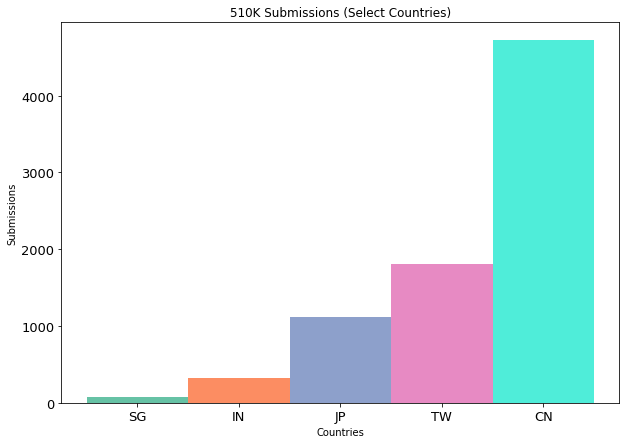

In [17]:
# Construct the plot using the plot method
color_scheme = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#4fedd9"]
_ = submissions_by_country.plot(                               # Tell python to discard the result of this call
    kind="bar"                                                 # Create a bar graph
    ,figsize=(10, 7)                                           # Adjust plot size (inches)
    ,color=color_scheme                                        # Use the specified color scheme for each category
    ,width=1                                                   # Set width of each bar to 1
    ,title="510K Submissions (Select Countries)"               # Set title of the plot
    ,xlabel="Countries"                                        # Set x-axis label to Countries
    ,ylabel="Submissions"                                      # Set y-axis label to Submissions
    ,rot=0                                                     # Do not rotate x axis ticks
    ,fontsize=13                                               # Set font size to 13
)

Neat, right? Just by looking at the graph, we can see that China dominates the number of submissions out of these 5 select countries. Are you getting a sense of how great data visualization is? Please do note that the call to the `plot` method still uses the `matplotlib` library behind the scenes. That being said, if you don't import `matplotlib` (we did this a few cells ago), none of the above code would work!

 By the way, there is one thing that you might have noticed.  The calls to the plot method actually return an `AxesSubplot` object... We won't be using that and the `_ = <expression>` is the way to tell Python to ignore the return value. People who work with the `matplotlib` library explicitly typically use an `AxesSubplot` object to create a chart and to customize the specific features of that chart. For instance, they could do things like drawing multiple graphs overlayed on top of one another. [Here](https://matplotlib.org/stable/gallery/showcase/anatomy.html#sphx-glr-gallery-showcase-anatomy-py) is an example of what cam be done with that! For us, we are leveraging the `plot` method of our Dataframe to draw a single visual and *basic* customization (through the parameters).

### Pie Charts
Now, let's say we want to break down each submissions by `origin_file`. In other words, we want to see how many submissions fall within each of the files that the dataset was sourced from. The distribution is relatively even and there are not too many categories to use so the pie chart is an excellent for this plot. We want to make sure we don't overwhelm the audience - consider for instance pie chart with the submissions broken down by the `COUNTRY_CODE`. There are too many countries and also the majority of the submissions originate from the U.S so that would really blow up the chart. Anyways, let's proceed with the former example!

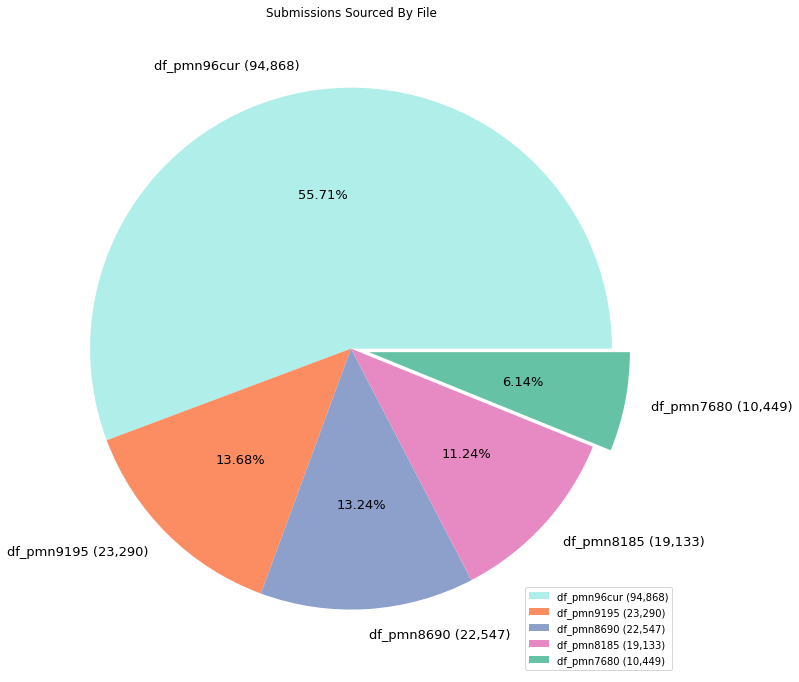

In [18]:
# Establish relevant data shape (number of submissions for each decision)
submissions_per_originfile = dataset_510k.groupby("origin_file").size().sort_values(ascending=False)

# Update index labels to include count of submissions
submissions_per_originfile_dict = submissions_per_originfile.to_dict()
updated_labels = [f"{originfile} ({submissions_per_originfile_dict[originfile]:,})"\
    for originfile in submissions_per_originfile.keys()]
submissions_per_originfile.index =  updated_labels

# Tell matplotlib to use a white background color
plt.rcParams['figure.facecolor'] = 'white'

# Display pie chart
color_scheme = ["#afeee9", "#fc8d62", "#8da0cb", "#e78ac3", "#66c2a5"]
_ = submissions_per_originfile.plot(        # Tell python to discard the result of this call
    title="Submissions Sourced By File"     # Set title
    ,kind="pie"                             # Create a pie chart
    ,legend=True                            # Display legends
    ,ylabel=""                              # Remove ylabel by setting it to empty
    ,figsize=(12, 12)                       # Adjust plot size
    ,fontsize=13                            # Set font size to 13
    ,autopct='%1.2f%%'                      # Automatically compute and display percentage across categories
    ,colors=color_scheme                    # Use defined color scheme
    ,explode=(0, 0, 0, 0, 0.07)             # Use to draw out one or more sectors of the pie
)

Cool, right? Notice how we sorted the dataset values from largest to smallest. This is generally a good practice for pie charts because we want to draw the user's attention in a specific direction. Note how we also made used of the `explode` property to highlight the smallest chunk of our pie. These are all strategies for drawing the reader's attention, and to make a good story!

### Area Charts
Now, we want to get an overall feel for the trend in the number of submissions by year. An area chart is an excellent choice for these types of plots as they give us a really good sense of depth. The way we can get the year part of our dates, is by using the `dt` attribute on the datetime columns to access date specific properties and methods (similar to how we used the `str` attribute on the string based columns).

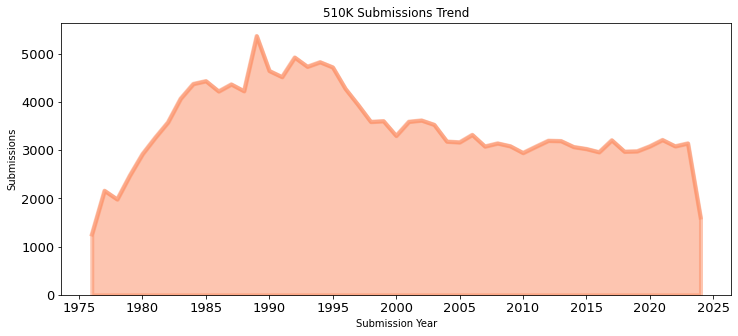

In [19]:
# Compute the number of submissions by year
dataset_510k["DATERECEIVED_YEAR"] = dataset_510k["DATERECEIVED"].dt.year
submissions_by_year = dataset_510k.groupby(["DATERECEIVED_YEAR"]).size().sort_index()

_ = submissions_by_year.plot(                             # Tell python not to store the result of this call
    title="510K Submissions Trend"                        # Set title of plot
    ,kind="area"                                          # Create area chart
    ,color='#fc8d62'                                      # Use this Hex color to highlight area
    ,alpha=0.5                                            # Add a transparency feature to graph
    ,xlabel="Submission Year"                             # Adjust x axis label
    ,ylabel="Submissions"                                 # Adjust y axis label
    ,linewidth=4                                          # Adjust line width
    ,figsize=(12, 5)                                      # Adjust figure size
    ,xticks=[year for year in range(1975, 2026, 5)]       # Set ticks to be spaced by 5's (requires knowledge of domain)
    ,fontsize=13                                          # Set font to 13
)

It looks like there was a spike in submissions between the year 1975 and 1990 then it stabilized onwards to an average of about $3000$ submissions per year. By keeping track of these types of trends, the agency may be able to better budget how much resources to allocate in processing submissions for the proceeding years.

## Vega Altair Introduction
Although `matplotlib` is a great data visualization library for Python, it is difficult to master and its visuals are a bit outdated. However, it still has its core strengths:
- **Flexibility**: It offers control over pretty much every aspect of your plot (of course, more customization requires more knowledge)
- **Foundation**: It is an excellent foundation to have as may other modern libraries (e.g.: Plotly, Seaborn) use it behind the scenes
- **Widely used**: It is still widely used in the world of data science today
- **Publication-ready**: It produces high quality graphics that are suitable for publication in academic journals and reports

Something that is completely missing from `matplotlib` is the concept of interactive visualizations, or charts with interactive features. As a data scientist and as a programmer, it's nice to have multiple options. There are a number of data visualization libraries that come into mind - a popular one out there is [Plotly](https://plotly.com/python/). However, we will be using a library called `Vega-Altair`. It is a modern library that produces high quality (interactive) [visualizations](https://altair-viz.github.io/gallery/index.html). Let's revisit our pie chart example from before. By the way, you can install the library as such if don't have it yet in your virtual environment: `pip install altair`.

When working with the `altair` library, here are some general guidelines:
1. Establish required data shape (i.e.: dependent on type of chart to build)
2. Establish base chart object (pass in relevant dataset to constructor)
   1. Map chart data fields to visual aspects of chart (via `encode` method of chart - chart type specifics)
      - e.g.: Setting which fields represents x and y axis on a line chart
      - e.g.: Setting which field should be colored in pie chart
   2. Call relevant `mark` method depending on the type of chart to create
      - e.g.: `mark_arc` is used to create a pie chart
      - e.g.: `marc_bar` is used to create a bar chart  
3. Configure general chart properties (properties available in altair.Chart [documentation](https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html))
4. Configure specific features of the chart
   - e.g.: Configure the fontsize of the title
   - e.g.: Configure legend alignment
5. Display chart


### Donut Chart
Let's go back to our pie chart example from earlier and see if we can replicate it using `altair`. We will make a small change to convert it into a donut chart so that we can further emphasize the fact that over $56\%$ of the submissions come from `df_pmn96cur`.

In [20]:
# Library to access altair functions
import altair as alt

# Establish required data shape
submissions_by_ofile = pd.DataFrame(submissions_per_originfile).reset_index()         # Reuse previous result and convert into a DataFrame
submissions_by_ofile.columns = ["ORIGIN_FILE", "SUBMISSIONS"]                         # Update column names
submissions_by_ofile["PERCENTAGE"] = (                                                # Compute percentages across sectors (submissions/total) and add as a new field
    submissions_by_ofile["SUBMISSIONS"] / submissions_by_ofile["SUBMISSIONS"].sum())

# Establish pie chart
chart = alt.Chart(data=submissions_by_ofile).encode(                                   # Initialize chart object and pass in relevant dataset and configure channels via encode
    theta=alt.Theta("SUBMISSIONS:Q")                                                   # Tell altair to use the quantitative (Q) column SUBMISSIONS to compute size of sectors
    ,color=alt.Color("ORIGIN_FILE:N")                                                  # Tell altair to color each sector based on the nominative (N) column ORIGIN_FILE
    ,tooltip=['ORIGIN_FILE', alt.Tooltip('PERCENTAGE:Q', format='.0%')]                # Tell altair to display the ORIGIN_FILE and PERCENTAGE values on hover over each sector
).mark_arc(innerRadius=190)                                                            # Tell altair to create pie chart (innerRadius parameter converts it into a donut chart)

# Configure general chart properties
chart.title = "Submissions By Origin File"                                             # Update general chart property title
chart.width = 500                                                                      # Update general chart property width (px)
chart.height = 500                                                                     # Update general chart property height (px)
chart.padding = 50                                                                     # Update general chart property padding (padding surrounding chart elements)

# Configure chart title specific properties
chart = chart.configure_title(                                                         # Tell altair to configure title specific properties
    fontSize=30                                                                        # Update font title size
    ,offset=50                                                                         # Update spacing between title and elements below it to 50px (offset)
)

# Configure legend specific properties
chart = chart.configure_legend(                                                        # Tell altair to configure legend specific properties
    titleFontSize=15                                                                   # Update legend title size
    ,labelFontSize=13                                                                  # Update label (underneath legend title) font size
    ,symbolOffset=20                                                                   # Move labels 20px from left
)

# Display chart
chart.display()

alt.Chart(...)

Not bad, right? We're still able to customize chart specific features using a high level API and the result look great. We also added an interactive hover feature which displays the `ORIGIN_FILE` and `PERCENTAGE` values based on the sector that is hovered over.

### Choropleth Chart
Now, let's visualize the submissions by U.S State. We can do that using a `choropleth` chart. It provides an easy way to visualize how a variable varies across a geographic area or show the level of variability within a region. Before we can proceed, first we need to have the FIPS codes for each U.S state. [This](https://www2.census.gov/geo/docs/reference/state.txt) data is relevant as the topological data that we will be referenced using these values so we need to make sure that we can lookup the topology of each state by those codes.

In [21]:
import requests
from io import StringIO

# Retrieve FIPS codes (ids) for each U.S states
url = "https://www2.census.gov/geo/docs/reference/state.txt"
fips_state_codes_raw = requests.get(url).content

# Load data into our pandas datafarme for further processing
fips_state_codes = pd.read_csv(StringIO(fips_state_codes_raw.decode('utf-8')), delimiter="|")
fips_state_codes.columns = ["FIPS_CODE", "STATE", "STATE_NAME", "STATENS"]
fips_state_codes.head(3)

FIPS_CODE STATE STATE_NAME  STATENS
0          1    AL    Alabama  1779775
1          2    AK     Alaska  1785533
2          4    AZ    Arizona  1779777

Now that we have that in place, we establish the desired data shape. This is simply a count of submissions by U.S state. Then, we merge the previous dataset with the result in order to have one combined dataset with the `FIPS_CODE`, `STATE`, `STATE_NAME`, `STATENS` and `SUBMISSIONS`.

In [22]:
# Establish desired data shape
us_mask = (dataset_510k["COUNTRY_CODE"] == "US")
submissions_by_state = pd.DataFrame(
    dataset_510k[us_mask].groupby("STATE").size()).reset_index()
submissions_by_state.columns = ["STATE", "SUBMISSIONS"]
submissions_by_state = pd.merge(submissions_by_state, fips_state_codes, how="inner", on="STATE")
submissions_by_state.head(3)

STATE  SUBMISSIONS  FIPS_CODE STATE_NAME  STATENS
0    AK            7          2     Alaska  1785533
1    AL          354          1    Alabama  1779775
2    AR           57          5   Arkansas    68085

Next, we retrieve the U.S topological data - we need this information to display the US state map. You need to make sure you have `vega_datasets` library installed for this part. Essentially, it contains the topological data for the U.S (states, counties, etc...). We are only concerned about the states so we will only pull in that information. If you display the `states` variable and open up the json file in an editor, you will see this more clearly under the `States` section. Each state is defined by its FIPS code (namely `id`) along with its corresponding geometry data. Listed below is the topographical data for the state of `HI`, with FIPS code `15`.

```json
{
    "type": "MultiPolygon",
    "arcs": [
        [[10337]]
        ,[[10342]]
        ,[[10341]]
        ,[[10343]]
        ,[[10834,10340]]
        ,[[10344]],
        ,[[10345]],
        ,[[10338]]
    ],
    "id": 15
}

In [23]:
# Retrieve US states topological data
from vega_datasets import data
states = alt.topo_feature(data.us_10m.url, 'states')
states.url

'https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/us-10m.json'

Finally, we can create our choropleth chart. We pass in the `states` topological data to create the chart and we pull in the `submissions_by_state` data by telling altair to match up the `id` colum that it has in its topological dataset with the `ID` column that we have established in our combined `submissions_by_state` dataset. Furthermore, we are telling it to bring back the `STATE`, `STATE_NAME` and the `SUBMISSIONS` data that corresponds to each `ID`. Without this, encoding section would not work. Remember that the encoding section is where we tell altair to map datafields with specific chart channels. In our case, the color should be based on the number of submissions and the tooltip is the hover feature that should display the name of the state and its submissions.

In [72]:
# Establish chloropleth chart
selection = alt.selection_point(on='click')                                           # Create a selection point parameter
chart = alt.Chart(data=states).mark_geoshape().encode(                                # Tell altair to encode chart channels
    color=alt.Color('SUBMISSIONS:Q', scale=alt.Scale(scheme="reds"))                  # Tell altair that coloring should be based on number of submissions with red color scheme
    ,tooltip=["STATE_NAME:N", "SUBMISSIONS:Q"]                                        # Tell altair that the state name and submissions should be displayed on hover
    ,opacity=alt.condition(selection, alt.value(1), alt.value(0.5))                   # Tell altair to highlight specific state that is clicked
).transform_lookup(
    lookup='id',                                                                      # Tell altair to use the id column of the states data to perform lookup
    from_=alt.LookupData(                                                             # Tell altair to pull down corresponding STATE, STATE_NAME and SUBMISSIONS data
        submissions_by_state, 'FIPS_CODE', ['STATE', 'STATE_NAME', 'SUBMISSIONS'])    # id => FIPS_CODE
).add_params(selection)

# Configure general chart properties
chart.title = "510K Submissions By U.S State"                                         # Configure the title of our chart 
chart.width = 1000                                                                    # Configure width of chart
chart.height = 600                                                                    # Configure height of chart
chart.padding = 50                                                                    # Configure padding of chart

# Configure chart title specific properties
chart = chart.configure_title(                                                         # Tell altair to configure title specific properties
    fontSize=30                                                                        # Update font title to 30
    ,offset=50                                                                         # Update spacing between title and elements below it to 50px (offset)
)

# Configure legend specific properties
chart = chart.configure_legend(                                                        # Tell altair to configure legend specific properties
    titleFontSize=15                                                                   # Update legend title size
    ,labelFontSize=13                                                                  # Update label (underneath legend title) font size
    ,symbolOffset=20                                                                   # Move labels 20px from left
)

# Display chart
chart.project(type='albersUsa')

alt.Chart(...)

From the visualization above, it makes it really easy to see the submission trends across the states. The darker shades mean more submissions, the lighter shades mean fewer submissions.

**Exercise:** Can you reproduce the area chart from the `matplotlib` example by *using* the `altair` library? It doesn't have to be super fancy but try to make it as clear and as descriptive as you can. You can use the `mark_area` method to create an area chart and use the `configure_area` method to customize area chart specific properties (e.g.: line color, gradients, etc... [Here](https://altair-viz.github.io/gallery/area_chart_gradient.html) is an example area chart)

## Week 6 Exercises
Pick and choose between one of the visual libraries discussed and use only that one but not both for all of the visualization exercises below unless otherwise specified.

**Exercise 1:** Which applicant has submitted the highest number of 510K submissions?

**Exercise 2:** Find the average review time for each product type and display the data in a bar chart.

**Exercise 3:** Which U.S state submitted the largest number of submissions?
- Type your answer here

**Exercise 3b:** Is this a surprise? Why or why not?
- Type your answer here

**Exercise 3c:** Break up the above submissions by the city and display in a *pie* chart the *top* $5$ cities of that state with the highest number of submissions. Be sure to sort your values to produce a better story!

**Challenge Exercise:** You *should* have used only one of the two visualization libraries to create the visualizations in the exercises above. Now, try to reproduce them with the other library.

# References

1. Data visualization: https://www.geeksforgeeks.org/data-visualization-and-its-importance/
2. Data visualization: https://www.youtube.com/watch?v=srz8y8x5zhc
3. Data visualization: https://www.geeksforgeeks.org/data-visualization-with-python/# 
4. Data storytelling: https://online.hbs.edu/blog/post/data-storytelling
5. Data storytelling: https://www.youtube.com/watch?v=Hfx1X9WSGYQ
6. Data storytelling: https://www.toucantoco.com/en/blog/data-storytelling-vs-data-visualization